# Housing Price Prediction

## Installing Packages

In [1]:
import pandas as pd # Data Processing
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Visualizations
import seaborn as sns # Visualizations

%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # Ignore Warnings

In [2]:
df_train = pd.read_csv('train.csv') # Training 
df_test = pd.read_csv('test.csv') # Test

## Exploring Datasets (EDA)

In [3]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

 ## Checking For Null Values

#### Cleaning Training Dataset

In [8]:
# Cleaning training dataset
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
# Checking How Many Nans in Each Column
train_null_col = df_train[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']]
train_null_col.isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
# Identifying which attributes contain numerical values 
train_null_col.select_dtypes(exclude='object').columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [11]:
# Imputing NaNs in the numerical columns of the original training set with the median
nan_val = df_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']] 
for med in nan_val:
    median_val = df_train[med].median()
    df_train[med].fillna(median_val, inplace=True)
    

In [12]:
# Identifying which attributes contain categorical values 
train_null_col.select_dtypes(include='object').columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [13]:
object_train = df_train[['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature']]
object_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Alley         91 non-null     object
 1   MasVnrType    588 non-null    object
 2   BsmtQual      1423 non-null   object
 3   BsmtCond      1423 non-null   object
 4   BsmtExposure  1422 non-null   object
 5   BsmtFinType1  1423 non-null   object
 6   BsmtFinType2  1422 non-null   object
 7   Electrical    1459 non-null   object
 8   FireplaceQu   770 non-null    object
 9   GarageType    1379 non-null   object
 10  GarageFinish  1379 non-null   object
 11  GarageQual    1379 non-null   object
 12  GarageCond    1379 non-null   object
 13  PoolQC        7 non-null      object
 14  Fence         281 non-null    object
 15  MiscFeature   54 non-null     object
dtypes: object(16)
memory usage: 182.6+ KB


In [14]:
object_train.columns[object_train.isnull().any()]

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [15]:
# Dropping categorical attributes that contain over a third NaN values
df_train = df_train.drop(['MasVnrType', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                            'Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond'],axis=1)

In [16]:
df_train.columns[df_train.isnull().any()]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [17]:
# Imputing NaNs in categorical attributes with the Mode
cat_col = df_train[['Alley', 'PoolQC', 'Fence', 'MiscFeature']]
for mode in cat_col:
    mode_val = df_train[mode].mode()[0]
    df_train[mode].fillna(mode_val, inplace=True)


In [18]:
df_train.columns[df_train.isnull().any()]

Index([], dtype='object')

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Cleaning Test Dataset

Matching Test dataset columns to the training dataset

In [20]:
# Finding Test columns not present in Training dataset
unique_test = set(df_test.columns).difference(set(df_train.columns))
unique_test

{'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Electrical',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'MasVnrType'}

In [21]:
# Dropping columns that are not in Training set
df_test = df_test.drop(['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual',
 'Electrical','FireplaceQu','GarageCond','GarageFinish','GarageQual','GarageType','MasVnrType'],axis=1)

In [22]:
# Cleaning testing dataset
df_test.columns[df_test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [23]:
# Checking How Many Nans in Each Column
test_null_col = df_test[['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType']]
test_null_col.isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt       78
GarageCars         1
GarageArea         1
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [24]:
# Identifying which attributes contain numerical values 
test_null_col.select_dtypes(include='number').columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [25]:
# Imputing NaNs in the numerical columns of the original testing set with the median
nan_val = df_test[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']] 
for med in nan_val:
    median_val = df_test[med].median()
    df_test[med].fillna(median_val, inplace=True)

In [26]:
# Columns from datasets match cannot drop anymore

In [27]:
df_test.columns[df_test.isnull().any()]

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'KitchenQual', 'Functional', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [28]:
# Imputing NaNs in categorical attributes with the Mode
cat_col = df_test[['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'KitchenQual', 'Functional', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType']]
for mode in cat_col:
    mode_val = df_test[mode].mode()[0]
    df_test[mode].fillna(mode_val, inplace=True)

In [29]:
df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

 #### Checking Distribution of Target Variable

<Axes: xlabel='SalePrice', ylabel='Density'>

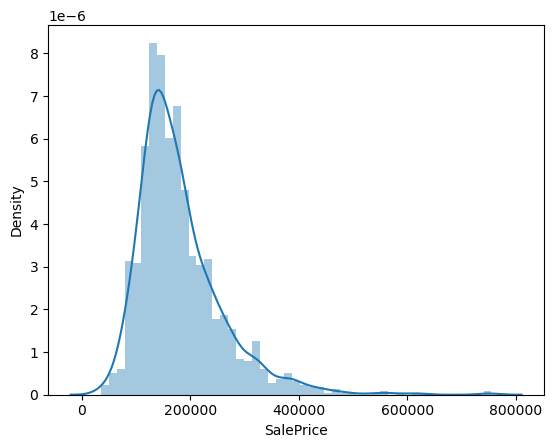

In [30]:
sns.distplot(df_train['SalePrice'])

It appears the distribution of the target variable is right skewed. <br>
This indicates the majority of data in the target is located under the mean. <br> 

## Feature Selection

#### 01. Correlation Matrix

<Axes: >

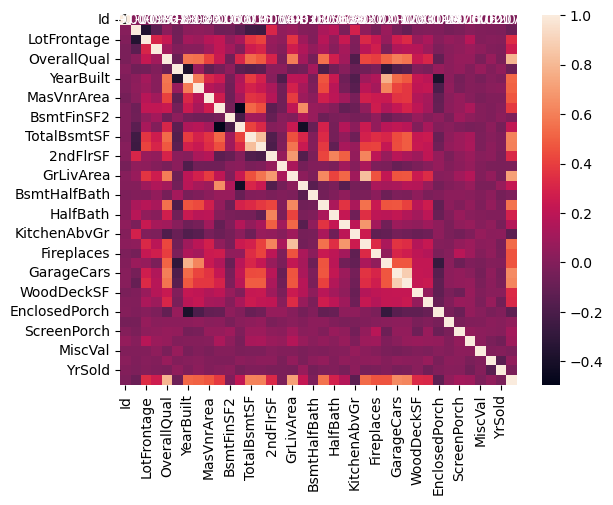

In [31]:
sns.heatmap(df_train.corr(numeric_only = True),annot=True)

#### 02. Univariate Testing

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression

In [33]:
# Seperating the numerical columns from the object columns in the independant variables
df_train_num = df_train.select_dtypes(exclude='object')

In [34]:
X = df_train_num.drop(['SalePrice'], axis = 1)
y = df_train['SalePrice']

In [35]:
# Feature Selector 
feat_selector = SelectKBest(f_regression,k='all')
fit = feat_selector.fit(X,y)

In [36]:
# P values and Scoring

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "f_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]

In [37]:
summary_stats

,input_variable,p_value,f_score
4,OverallQual,2.185675e-313,2436.770591
16,GrLivArea,4.518034e-223,1470.585010
26,GarageCars,2.498644e-169,1013.705666
27,GarageArea,5.265038e-158,926.951287
12,TotalBsmtSF,9.484229e-152,880.341282
13,1stFlrSF,5.394711e-147,845.524488
19,FullBath,1.236470e-121,668.430296
23,TotRmsAbvGrd,2.772281e-108,580.762801
6,YearBuilt,2.990229e-103,548.665821
7,YearRemodAdd,3.164948e-96,504.714855


In [38]:
selected_variables

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'GarageYrBlt',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MSSubClass',
 'OverallCond']

In [39]:
X_new

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,PoolArea,MSSubClass,OverallCond
0,7,1710,2,548,856,856,2,8,2003,2003,...,8450,1,150,3,1,0,0,0,60,5
1,6,1262,2,460,1262,1262,2,6,1976,1976,...,9600,0,284,3,1,0,0,0,20,8
2,7,1786,2,608,920,920,2,6,2001,2002,...,11250,1,434,3,1,0,0,0,60,5
3,7,1717,3,642,756,961,1,7,1915,1970,...,9550,1,540,3,1,272,0,0,70,5
4,8,2198,3,836,1145,1145,2,9,2000,2000,...,14260,1,490,4,1,0,0,0,60,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000,...,7917,0,953,3,1,0,0,0,60,5
1456,6,2073,2,500,1542,2073,2,7,1978,1988,...,13175,1,589,3,1,0,0,0,20,6
1457,7,2340,1,252,1152,1188,2,9,1941,2006,...,9042,0,877,4,1,0,0,0,70,9
1458,5,1078,1,240,1078,1078,1,5,1950,1996,...,9717,1,0,2,1,112,0,0,20,6


#### 03. PCA

- 03A <br>
Determining the appropriate number of components using scree plots

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate PCA object
pca = PCA()

# Fit PCA model to data
pca.fit(X_scaled)

PCA()

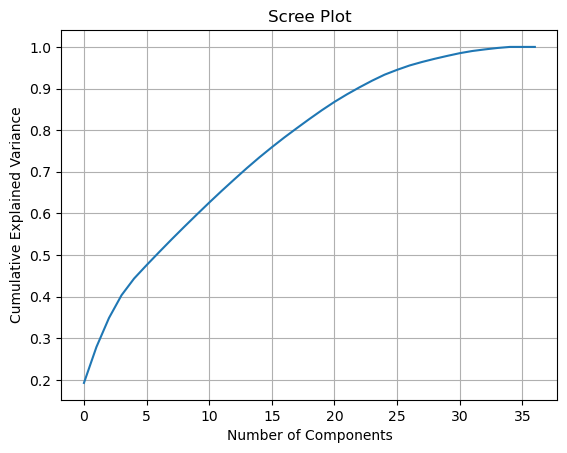

In [42]:
# Step 5: Plot the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

According to the scree plot, 24 components are optimal when observing how the line begins to level off between 20 and 25. <br>
This indicates that after 24 components, the explained variance begins to diminish with each component.

- 03B <br>
Reinstantiate the PCA object with 22 components and transform the data from the original dataset.

In [43]:
# Instantiate PCA object
num_components = 24
pca = PCA(n_components=num_components)

# Fit PCA model to data
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
X_pca

array([[ 1.46990118e+00,  3.45550180e-01, -1.70376698e+00, ...,
        -1.28488503e-03,  3.11741763e-01, -9.21043996e-02],
       [-2.88940442e-02, -1.08878135e+00,  1.25468318e+00, ...,
        -1.49855930e+00, -7.07584361e-01, -4.16040236e-01],
       [ 1.65656229e+00,  2.22751322e-01, -1.48055586e+00, ...,
         4.61010667e-01, -4.67312911e-01, -4.33981849e-02],
       ...,
       [ 4.84907183e-01,  3.35796009e+00,  1.65153062e+00, ...,
         5.59632345e-01, -1.53066374e+00, -1.56306412e+00],
       [-2.82632588e+00, -1.96969440e+00,  1.98216370e+00, ...,
         6.47910016e-01,  7.58204503e-01,  3.71862853e-01],
       [-8.66718770e-01, -1.46737747e+00,  1.59478954e+00, ...,
        -1.66720410e+00,  1.10533904e+00,  1.52515872e+00]])

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [45]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 3: Fit a linear regression model using PCA-transformed features
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", rmse)

Mean Squared Error: 38348.19212391146


**04. Cross-Validation**


In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
# Creating range of PCA components to try on Linear Regression model 
component_range = range(15,30) # Based on earlier Scree plot of optimal number of components

In [48]:
# Initializing lists to store cross-validation scores
cv_scores_mean = []
cv_scores_std = []

# Looping over different PCA component values
for num_components in component_range:
    # Performing PCA transformation
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X)
    
    # Fitting Linear Regression model
    model = LinearRegression()

    # Cross-validation
    cv_scores = cross_val_score(model, X_pca, y, cv=10, scoring='neg_mean_squared_error')

    # Convert negative MSE to RMSE
    cv_scores = np.sqrt(-cv_scores)
    
    # Scoring mean and std of cross-validation scores
    cv_scores_mean.append(np.mean(cv_scores))
    cv_scores_std.append(np.std(cv_scores))    

In [49]:
print(cv_scores_mean)

[43792.19436573466, 43806.568966092, 43871.75804773996, 43795.69819230902, 40051.93283495268, 40146.0057639402, 39920.67728708106, 39718.01703476683, 39764.06708616727, 39761.65433054957, 38470.67441118585, 37504.05569710139, 35219.29317386933, 35141.312101921954, 35072.25062088176]


In [50]:
# Printing results
for i, num_components in enumerate(component_range):
    print("Number of Components:", num_components)
    print("Mean RMSE:", cv_scores_mean[i])
    print("Standard Deviation of RMSE:", cv_scores_std[i])
    print()

Number of Components: 15
Mean RMSE: 43792.19436573466
Standard Deviation of RMSE: 12375.516826954889

Number of Components: 16
Mean RMSE: 43806.568966092
Standard Deviation of RMSE: 12337.677255119957

Number of Components: 17
Mean RMSE: 43871.75804773996
Standard Deviation of RMSE: 12292.148038362568

Number of Components: 18
Mean RMSE: 43795.69819230902
Standard Deviation of RMSE: 11935.78119422949

Number of Components: 19
Mean RMSE: 40051.93283495268
Standard Deviation of RMSE: 11778.114650368303

Number of Components: 20
Mean RMSE: 40146.0057639402
Standard Deviation of RMSE: 11676.784997759101

Number of Components: 21
Mean RMSE: 39920.67728708106
Standard Deviation of RMSE: 11845.922209958051

Number of Components: 22
Mean RMSE: 39718.01703476683
Standard Deviation of RMSE: 11670.84577801443

Number of Components: 23
Mean RMSE: 39764.06708616727
Standard Deviation of RMSE: 11697.545065480332

Number of Components: 24
Mean RMSE: 39761.65433054957
Standard Deviation of RMSE: 11685

### Applying Feature Reduction Methods on Model

#### 01 Linear Regression Model Using Univariate Testing

#### 02 Linear Regression Model Using PCA

#### 03 Linear Regression Model Using Cross-Validation